## **TASK NO.04**

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [ ]:
!pip install snscrape

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk. corpus import stopwords
from nltk. tokenize import word_tokenize
from nltk. stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import re
import textblob
from textblob import TextBlob
import os
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

LOADING THE DATASET

In [ ]:
#Full dataset for Train-Test
df1=pd.read_csv("twitter_train_data.csv")

#Validation dataset
df2=pd.read_csv("twitter_val_data.csv")

In [ ]:
df1.columns=['id','information','type','text']
df1.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df2.columns=['id','information','type','text']
df2.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
train_data=df1
train_data

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
val_data=df2
val_data

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


TEXT TRANSFORMATION

In [ ]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [ ]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


PLOTTING FEATURES

In [ ]:
#Count information per category
plot1=df1.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


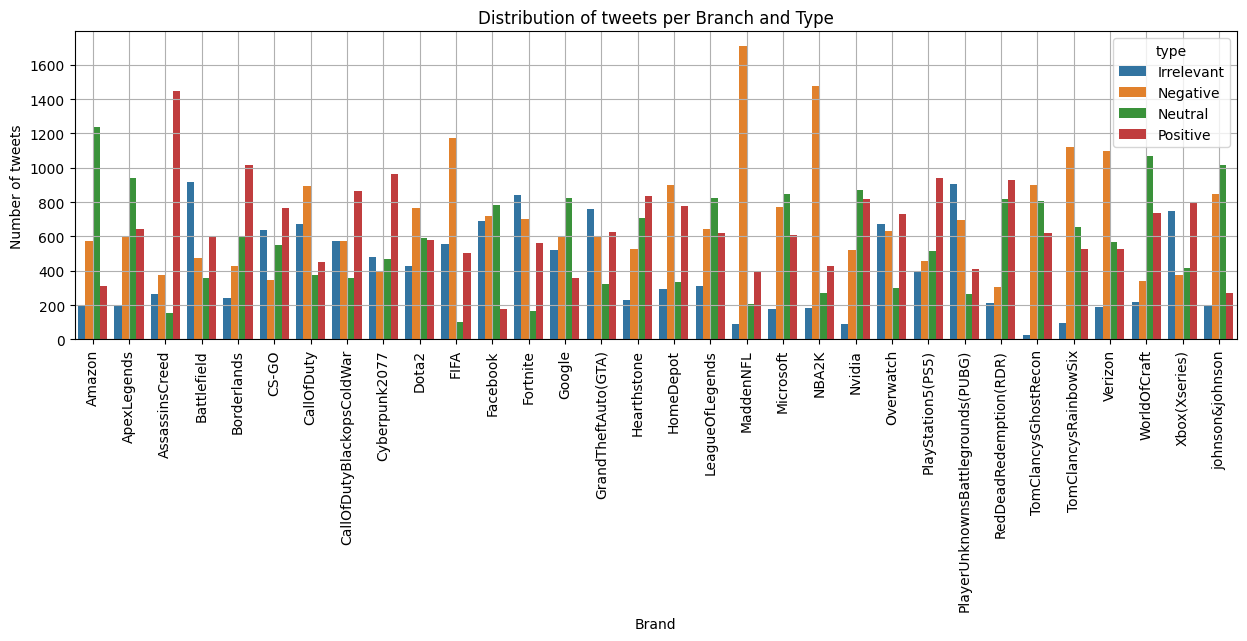

In [ ]:
#Figure of comparison per branch
plt.figure(figsize=(15,4))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

VISUALIZATION

In [ ]:
!pip install vaderSentiment

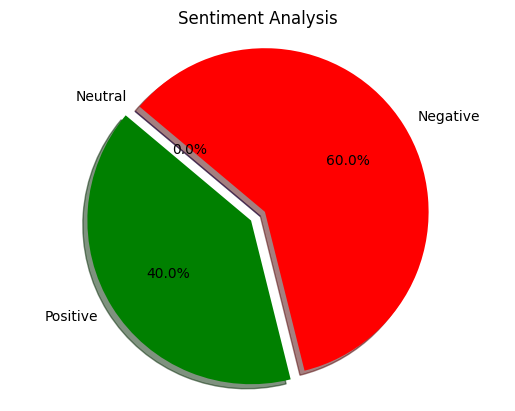

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

social_media_posts = [
    "I love the new iPhone! It's amazing!",
    "The customer service was terrible.",
    "Just got a refund for my broken headphones, thanks!",
    "This restaurant has the worst food ever.",
    "Excited about the upcoming product launch!",]
# Initialize sentiment counters
positive_count = 0
negative_count = 0
neutral_count = 0

analyzer = SentimentIntensityAnalyzer()
# Analyze sentiment
for post in social_media_posts:
    sentiment_scores = analyzer.polarity_scores(post)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        positive_count += 1
    elif compound_score <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1

# Visualize sentiment using a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis')
plt.show()


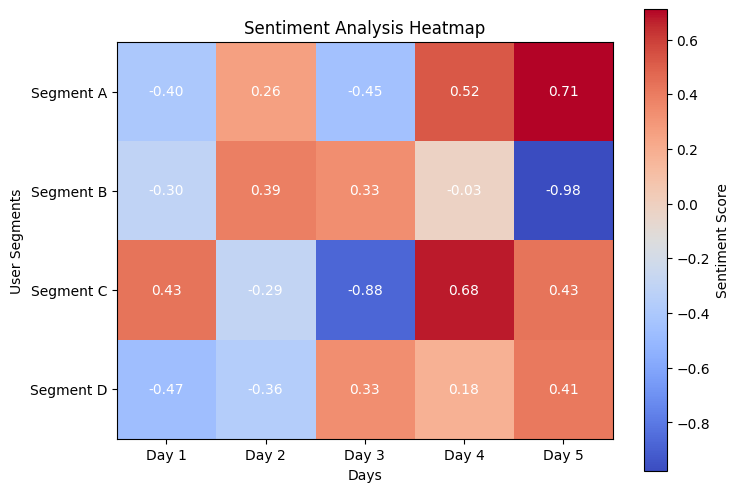

In [ ]:
# Random data for Heatmap
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
user_segments = ['Segment A', 'Segment B', 'Segment C', 'Segment D']
sentiment_scores = np.random.rand(len(user_segments), len(days)) * 2 - 1
# Create a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(sentiment_scores, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(days)), days)
plt.yticks(np.arange(len(user_segments)), user_segments)
plt.xlabel('Days')
plt.ylabel('User Segments')
plt.title('Sentiment Analysis Heatmap')

# Add text annotations
for i in range(len(user_segments)):
    for j in range(len(days)):
        plt.text(j, i, f'{sentiment_scores[i, j]:.2f}', ha='center', va='center', color='w')
plt.show()

TEXT ANALYSIS

In [ ]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [ ]:
tokens_text[1]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [ ]:
tokens_text[2]

['im',
 'coming',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all']

In [ ]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

LOGISTIC REGRESSION MODEL

In [ ]:
#Initial Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

TRAIN-TEST MODEL

In [ ]:
#Train-Test splitting
from sklearn.model_selection import train_test_split
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [ ]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [ ]:
X_test_bow

<14937x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 161164 stored elements in Compressed Sparse Row format>

In [ ]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.301399
Positive      0.281717
Neutral       0.244895
Irrelevant    0.171989
Name: type, dtype: float64

ACCURACY OF MODEL

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.34337551047733


In [ ]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [ ]:
X_val_bow

<999x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 12893 stored elements in Compressed Sparse Row format>

In [ ]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  93.1931931931932


In [ ]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_bow

<59744x1428316 sparse matrix of type '<class 'numpy.int64'>'
	with 4142525 stored elements in Compressed Sparse Row format>

In [ ]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  90.975430139921


In [ ]:
y_val_bow = val_data['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.8988988988989
